# Algorithms and mathematics of machine learning
## Laboratory 6

### Task 1

Implement a simulation of Monty Hall's paradox. E.g. 10,000 games for both cases (when the player stays at the selected door and when the player changes the selection).
Is the simulation result consistent with theory?

From [Wikipedia](https://en.wikipedia.org/wiki/Monty_Hall_problem):

>Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?<br><br>Contestant response was that the contestant should switch to the other door. Under the standard assumptions, the switching strategy has a $2/3$ probability of winning the car, while the strategy of sticking with the initial choice has only a $1/3$ probability.<br><br>When the player first makes their choice, there is a $2/3$ chance that the car is behind one of the doors not chosen. This probability does not change after the host reveals a goat behind one of the unchosen doors. When the host provides information about the two unchosen doors (revealing that one of them does not have the car behind it), the $2/3$ chance of the car being behind one of the unchosen doors rests on the unchosen and unrevealed door, as opposed to the $1/3$ chance of the car being behind the door the contestant chose initially.

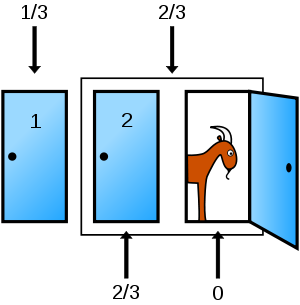

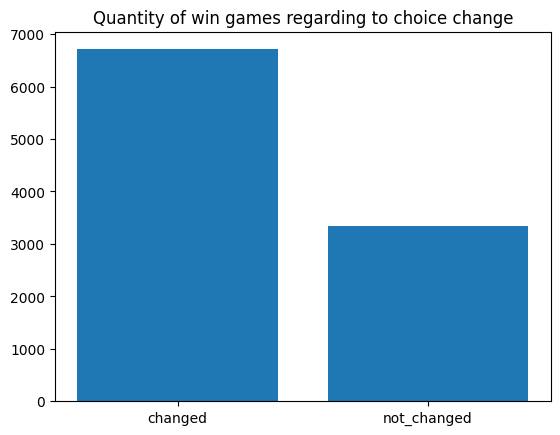

In [1]:
from numpy import zeros
from random import randint
from matplotlib.pyplot import bar, show, xticks, title


def game(change_choice: bool) -> bool:
    price = zeros(3).astype(int)
    price[randint(0, price.shape[0] - 1)] = 1

    pick = price[randint(0, price.shape[0] - 1)]
    return (change_choice and pick == 0) or (not change_choice and pick == 1)


def simulate_game(change_choice: bool, max_iter: int = 10_000) -> dict:
    win_quantity = 0

    for _ in range(max_iter):
        if game(change_choice):
            win_quantity += 1

    return win_quantity


results = {
    'changed': simulate_game(change_choice=True, max_iter=10_000),
    'not_changed': simulate_game(change_choice=False, max_iter=10_000)
}

title('Quantity of win games regarding to choice change')
bar([0, 1], [results.get('changed'), results.get('not_changed')])
xticks([0, 1], results.keys())
show()

### Task 2

#### A)
Load $m$ letters from the keyboard (they may be repeated), and then write out all permutations of these $m$ letters, highlighting those that form correct Polish words (based on the dictionary downloaded and unpacked from https://sjp.pl/sl/growy/).

Conditions:
- Write 5 permutations on one line and then move to a new line.
- If the entered string contains characters other than `[a-z]` (only Latin letters), an appropriate message should be printed.
- The entered letters may be repeated, but the permutations are not repeated.
For example, for the entered string `aaab`, the program should print only 4 permutations (in any order): `aaab`, `aaba`, `abaa`, `baaa`.

Example:

```
Enter 4 letters from [a-z]: aatm
aatm    aamt    atam    atma    amat

amta    taam    tama    tmaa    maat
                ----
mata    mtaa
----
```

#### B)
Write a formula that will allow you to display the number of permutations described in this way without having to generate them.

#### A)

In [2]:
with open('words.txt', encoding='utf-8') as f:
    dic_words = [line[:len(line) - 1] for line in f.readlines()]

In [3]:
from itertools import permutations


def get_letter_permutations(text: str) -> set:
    return set([''.join(perm) for perm in tuple(permutations(text))])


def get_perms_with_marked_words(letters: str) -> str:
    permuts = get_letter_permutations(letters)

    all_lines, word_line, sep_line = '', '', ''
    for i, word in enumerate(permuts):
        if word in dic_words:
            sep_line += '-'.join(['' for _ in range(len(word) + 1)])
        else:
            sep_line += ' '.join(['' for _ in range(len(word) + 1)])

        word_line, sep_line = f'{word_line}{word}   ', f'{sep_line}   '

        if (i + 1) % 5 == 0 or len(permuts) == i + 1:
            all_lines = f'{all_lines}\n{word_line}\n{sep_line}'
            word_line, sep_line = '', ''

    return all_lines

In [4]:
m = int(input('Enter how many letters you want to enter:'))
letters = input('Enter the letters:')

if len(letters) != m:
    raise ValueError('You entered the wrong number of letters')

print(get_perms_with_marked_words(letters))


atam   amta   tmaa   aatm   taam   
                                   
aamt   tama   mtaa   amat   atma   
       ----                        
mata   maat   
----          


#### B)

$$
  P_{k_{1}k_{2}k_{3}...k_{m}}(n) = \frac{n!}{k_{1}!k_{2}!k_{3}!...k_{m}!}
$$